In [71]:
import pandas as pd
import json
import sklearn

In [72]:
# Load cleaned charging data
charging_data: pd.DataFrame = pd.read_pickle('data/charging_modified.pkl')

# Print head
charging_data.head()

,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,spaceID,stationID,userID,weekday,...,month,userRegistered,user_paymentRequired_values,user_requestedDeparture,user_modifiedAt,user_minutesAvailable,user_milesRequested,user_kWhRequested,user_WhPerMile,user_kWhRequestFulfilment
0,5bc90cb9f9af8b0d7fe77cd3,2018-04-25 13:45:10+00:00,2018-04-26 00:56:16+00:00,2018-04-25 16:44:15+00:00,10.013,2,CA-319,2-39-95-27,NaN,Wednesday,...,4,unregistered,None,None,None,NaN,NaN,NaN,NaN,NaN
1,5bc90cb9f9af8b0d7fe77cd4,2018-04-25 13:45:50+00:00,2018-04-25 23:04:45+00:00,2018-04-25 14:51:44+00:00,5.257,2,CA-489,2-39-79-380,NaN,Wednesday,...,4,unregistered,None,None,None,NaN,NaN,NaN,NaN,NaN
2,5bc90cb9f9af8b0d7fe77cd5,2018-04-25 14:37:06+00:00,2018-04-25 23:55:34+00:00,2018-04-25 16:05:22+00:00,5.177,2,CA-327,2-39-79-379,NaN,Wednesday,...,4,unregistered,None,None,None,NaN,NaN,NaN,NaN,NaN
3,5bc90cb9f9af8b0d7fe77cd6,2018-04-25 14:40:34+00:00,2018-04-25 23:03:12+00:00,2018-04-25 17:40:30+00:00,10.119,2,CA-490,2-39-79-381,NaN,Wednesday,...,4,unregistered,None,None,None,NaN,NaN,NaN,NaN,NaN
4,5bc90cb9f9af8b0d7fe77cd7,2018-04-25 14:43:50+00:00,2018-04-26 01:17:30+00:00,2018-04-25 16:18:28+00:00,7.910,2,CA-303,2-39-139-28,NaN,Wednesday,...,4,unregistered,None,None,None,NaN,NaN,NaN,NaN,NaN


## Preparing the data

In [73]:
prepared_data = charging_data.copy()
prepared_data['evIsFullyCharged'] = prepared_data['doneChargingTime'].notnull()
display(prepared_data.head())

,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,spaceID,stationID,userID,weekday,...,userRegistered,user_paymentRequired_values,user_requestedDeparture,user_modifiedAt,user_minutesAvailable,user_milesRequested,user_kWhRequested,user_WhPerMile,user_kWhRequestFulfilment,evIsFullyCharged
0,5bc90cb9f9af8b0d7fe77cd3,2018-04-25 13:45:10+00:00,2018-04-26 00:56:16+00:00,2018-04-25 16:44:15+00:00,10.013,2,CA-319,2-39-95-27,NaN,Wednesday,...,unregistered,None,None,None,NaN,NaN,NaN,NaN,NaN,True
1,5bc90cb9f9af8b0d7fe77cd4,2018-04-25 13:45:50+00:00,2018-04-25 23:04:45+00:00,2018-04-25 14:51:44+00:00,5.257,2,CA-489,2-39-79-380,NaN,Wednesday,...,unregistered,None,None,None,NaN,NaN,NaN,NaN,NaN,True
2,5bc90cb9f9af8b0d7fe77cd5,2018-04-25 14:37:06+00:00,2018-04-25 23:55:34+00:00,2018-04-25 16:05:22+00:00,5.177,2,CA-327,2-39-79-379,NaN,Wednesday,...,unregistered,None,None,None,NaN,NaN,NaN,NaN,NaN,True
3,5bc90cb9f9af8b0d7fe77cd6,2018-04-25 14:40:34+00:00,2018-04-25 23:03:12+00:00,2018-04-25 17:40:30+00:00,10.119,2,CA-490,2-39-79-381,NaN,Wednesday,...,unregistered,None,None,None,NaN,NaN,NaN,NaN,NaN,True
4,5bc90cb9f9af8b0d7fe77cd7,2018-04-25 14:43:50+00:00,2018-04-26 01:17:30+00:00,2018-04-25 16:18:28+00:00,7.910,2,CA-303,2-39-139-28,NaN,Wednesday,...,unregistered,None,None,None,NaN,NaN,NaN,NaN,NaN,True


In [74]:
# Reduce the data to the columns we are interested in
prepared_data = prepared_data[['siteID', 'connectionTime', 'disconnectTime', 'kWhDelivered', 'userRegistered', 'evIsFullyCharged']]
display(prepared_data.head())

,siteID,connectionTime,disconnectTime,kWhDelivered,userRegistered,evIsFullyCharged
0,2,2018-04-25 13:45:10+00:00,2018-04-26 00:56:16+00:00,10.013,unregistered,True
1,2,2018-04-25 13:45:50+00:00,2018-04-25 23:04:45+00:00,5.257,unregistered,True
2,2,2018-04-25 14:37:06+00:00,2018-04-25 23:55:34+00:00,5.177,unregistered,True
3,2,2018-04-25 14:40:34+00:00,2018-04-25 23:03:12+00:00,10.119,unregistered,True
4,2,2018-04-25 14:43:50+00:00,2018-04-26 01:17:30+00:00,7.910,unregistered,True


In [75]:
# Fix the data types
prepared_data = prepared_data.astype(
    {
        'kWhDelivered': 'float64', 
        'userRegistered': 'category'
    }
)
prepared_data.head()

,siteID,connectionTime,disconnectTime,kWhDelivered,userRegistered,evIsFullyCharged
0,2,2018-04-25 13:45:10+00:00,2018-04-26 00:56:16+00:00,10.013,unregistered,True
1,2,2018-04-25 13:45:50+00:00,2018-04-25 23:04:45+00:00,5.257,unregistered,True
2,2,2018-04-25 14:37:06+00:00,2018-04-25 23:55:34+00:00,5.177,unregistered,True
3,2,2018-04-25 14:40:34+00:00,2018-04-25 23:03:12+00:00,10.119,unregistered,True
4,2,2018-04-25 14:43:50+00:00,2018-04-26 01:17:30+00:00,7.910,unregistered,True


In [76]:
# Get delta between connection and disconnect time
prepared_data['connectionDurationInHours'] = (prepared_data['disconnectTime'] - prepared_data['connectionTime']).dt.total_seconds() / 3600

# Remove the date from the time columns and only keep the time
prepared_data['connectionTime'] = pd.to_datetime(prepared_data['connectionTime']).dt.time
prepared_data['connectionTimeInSecondsSinceMidnight'] = prepared_data['connectionTime'].apply(lambda x: x.hour + x.minute / 60 + x.second / 3600)
display(prepared_data.head())

# Convert the time to seconds
df_for_clustering = prepared_data.copy()
df_for_clustering = df_for_clustering.drop(columns=['connectionTime', 'disconnectTime'])

display(df_for_clustering.head())

,siteID,connectionTime,disconnectTime,kWhDelivered,userRegistered,evIsFullyCharged,connectionDurationInHours,connectionTimeInSecondsSinceMidnight
0,2,13:45:10,2018-04-26 00:56:16+00:00,10.013,unregistered,True,11.185000,13.752778
1,2,13:45:50,2018-04-25 23:04:45+00:00,5.257,unregistered,True,9.315278,13.763889
2,2,14:37:06,2018-04-25 23:55:34+00:00,5.177,unregistered,True,9.307778,14.618333
3,2,14:40:34,2018-04-25 23:03:12+00:00,10.119,unregistered,True,8.377222,14.676111
4,2,14:43:50,2018-04-26 01:17:30+00:00,7.910,unregistered,True,10.561111,14.730556


,siteID,kWhDelivered,userRegistered,evIsFullyCharged,connectionDurationInHours,connectionTimeInSecondsSinceMidnight
0,2,10.013,unregistered,True,11.185000,13.752778
1,2,5.257,unregistered,True,9.315278,13.763889
2,2,5.177,unregistered,True,9.307778,14.618333
3,2,10.119,unregistered,True,8.377222,14.676111
4,2,7.910,unregistered,True,10.561111,14.730556


In [77]:
# Label encode ordinal columns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# User registered is not really ordinal, but we will treat it as such and then convert it to boolean
df_for_clustering['userRegistered'] = label_encoder.fit_transform(df_for_clustering['userRegistered'])
df_for_clustering = df_for_clustering.astype({'userRegistered': 'bool'})

display(df_for_clustering.head())

,siteID,kWhDelivered,userRegistered,evIsFullyCharged,connectionDurationInHours,connectionTimeInSecondsSinceMidnight
0,2,10.013,True,True,11.185000,13.752778
1,2,5.257,True,True,9.315278,13.763889
2,2,5.177,True,True,9.307778,14.618333
3,2,10.119,True,True,8.377222,14.676111
4,2,7.910,True,True,10.561111,14.730556


In [78]:
# One hot encode nominal columns
# this increases the dimensionality of the data (labels encoding would imply an ordinal relationship between the values)
df_for_clustering = pd.get_dummies(df_for_clustering, columns=['siteID'])
display(df_for_clustering.head())

,kWhDelivered,userRegistered,evIsFullyCharged,connectionDurationInHours,connectionTimeInSecondsSinceMidnight,siteID_1,siteID_2
0,10.013,True,True,11.185000,13.752778,False,True
1,5.257,True,True,9.315278,13.763889,False,True
2,5.177,True,True,9.307778,14.618333,False,True
3,10.119,True,True,8.377222,14.676111,False,True
4,7.910,True,True,10.561111,14.730556,False,True


## Normalizing the data

In [79]:
from sklearn.preprocessing import MinMaxScaler

# Scale the data in the range [0, 1]
scaler = MinMaxScaler()

scaled_data = pd.DataFrame(scaler.fit_transform(df_for_clustering), columns=df_for_clustering.columns)
scaled_data.head()

,kWhDelivered,userRegistered,evIsFullyCharged,connectionDurationInHours,connectionTimeInSecondsSinceMidnight,siteID_1,siteID_2
0,0.126781,1.0,1.0,0.045337,0.573052,0.0,1.0
1,0.063391,1.0,1.0,0.037712,0.573515,0.0,1.0
2,0.062324,1.0,1.0,0.037681,0.609118,0.0,1.0
3,0.128194,1.0,1.0,0.033886,0.611526,0.0,1.0
4,0.098751,1.0,1.0,0.042793,0.613794,0.0,1.0


## Clustering

In [80]:
random_state = 42

def kmean(data, n_clusters):
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=random_state)
    labels = kmeans.fit_predict(data)
    return labels, kmeans

def pca(data):
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(data)
    return pca_result

def pca_based_kmean(data, n_clusters):
    pca_result = pca(data)
    labels, kmeans = kmean(pca_result, n_clusters)
    return labels, kmeans, pca_result

In [81]:
import numpy as np
import matplotlib.pyplot as plt

def plot_kmeans(data, labels):
    u_labels = np.unique(labels)
    for i in u_labels:
        plt.scatter(data[labels == i, 0], data[labels == i, 1], label=f'Cluster {i}')
    plt.legend()
    plt.show() 
    
def perform_kmeans_and_plot(data, n_clusters):
    labels, kmeans, pca_result = pca_based_kmean(data, n_clusters)
    plot_kmeans(pca_result, labels)
    return labels, kmeans, pca_result

## Clustering the whole data

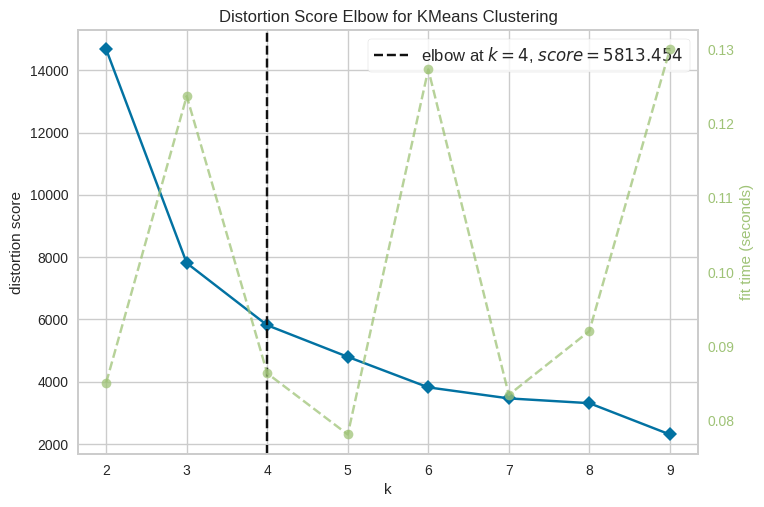

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=9, n_init='auto', random_state=42),
                 k=(2, 10))

In [82]:
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer

# Find the best number of clusters via elbow method
kelbow_visualizer(KMeans(random_state=random_state, n_init='auto'), scaled_data, k=(2,10))

In [83]:
def cluster_data_and_get_labels(number_of_clusters: int):
    labels, kmeans, pca_result = perform_kmeans_and_plot(scaled_data, number_of_clusters)

    # Group the data by cluster
    scaled_clusters_df = df_for_clustering.copy()
    scaled_clusters_df['cluster'] = labels
    scaled_clusters_df = scaled_clusters_df.groupby('cluster')
    
    # Apply cluster to the original data
    clusters_df_original = prepared_data.copy()
    clusters_df_original['cluster'] = labels
    clusters_df_original = clusters_df_original.groupby('cluster')
    display(clusters_df_original.describe())

    # Raw data unscaled
    return scaled_clusters_df, clusters_df_original

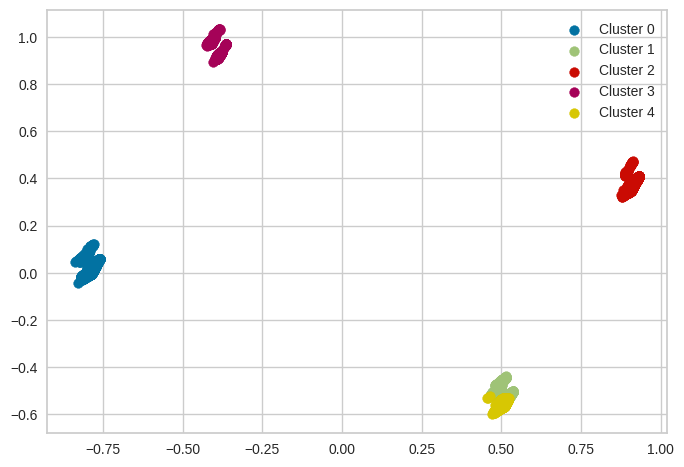

kWhDelivered                                                        \
               count       mean        std    min     25%     50%      75%   
cluster                                                                      
0            23817.0  14.505959  10.922208  0.502  6.9120  11.603  17.2970   
1             2491.0   9.721573   7.238747  0.529  4.3580   7.985  13.3395   
2            13869.0   7.272457   5.979187  0.501  2.2520   6.089  11.6400   
3             1908.0   6.103819   6.540978  0.502  0.8440   3.281  10.4695   
4            10839.0  10.858186  10.033166  0.510  4.3795   7.620  13.5930   

                connectionDurationInHours            ...            \
            max                     count      mean  ...       75%   
cluster                                              ...             
0        66.971                   23817.0  7.535311  ...  9.786111   
1        53.590                    2491.0  4.984848  ...  6.631250   
2        61.550                   13869.0  5.562753  ...  8.465556   
3        36.898                    1908.0  6.336982  ...  9.261042   
4        75.528                   10839.0  6.675558  ...  8.896806   

                    connectionTimeInSecondsSinceMidnight                       \
                max                                count       mean       std   
cluster                                                                         
0         54.147778                              23817.0  15.243716  3.923899   
1        158.082778                               2491.0   6.275805  6.948932   
2        245.269167                              13869.0  13.824994  7.016759   
3         58.740000                               1908.0  15.938541  4.225099   
4        214.321944                              10839.0  17.549759  2.984652   

                                                               
              min        25%        50%        75%        max  
cluster                                                        
0        0.004167  13.860556  14.636389  16.015000  23.999167  
1        0.000000   1.434167   2.979167   9.745139  23.969444  
2        0.001944   7.824167  15.890833  18.522778  23.996667  
3        0.015278  14.038819  15.155694  18.878750  23.994722  
4        0.040833  16.069167  17.154722  19.205556  23.996389  

[5 rows x 24 columns]

In [84]:
df_4_clusters, df_original = cluster_data_and_get_labels(5)

In [85]:
# Visualize the clustered data

Cluster 0


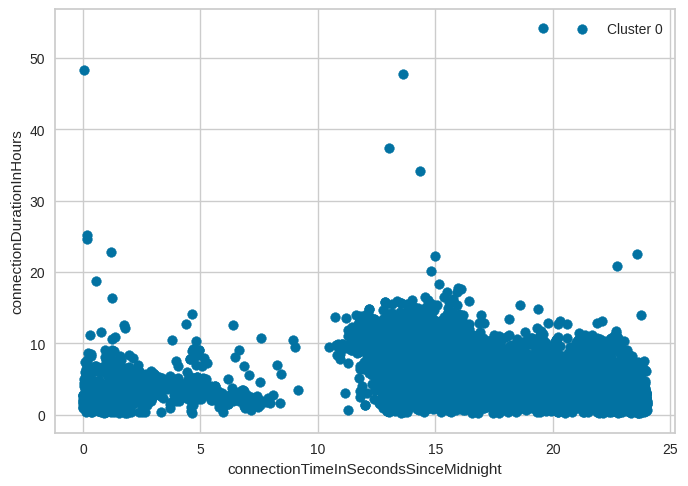

Cluster 1


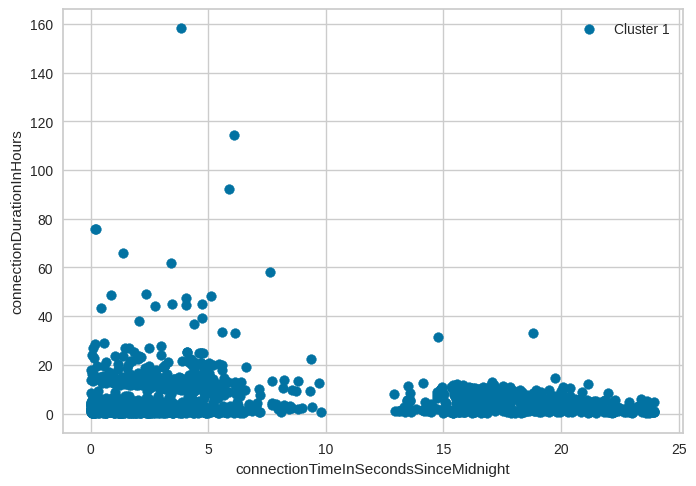

Cluster 2


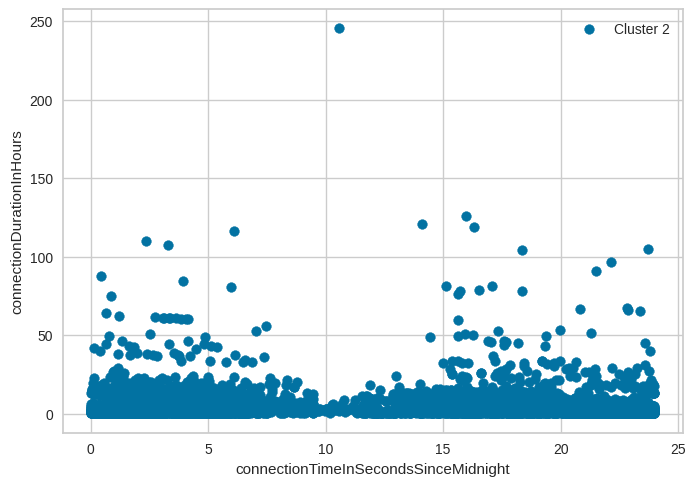

Cluster 3


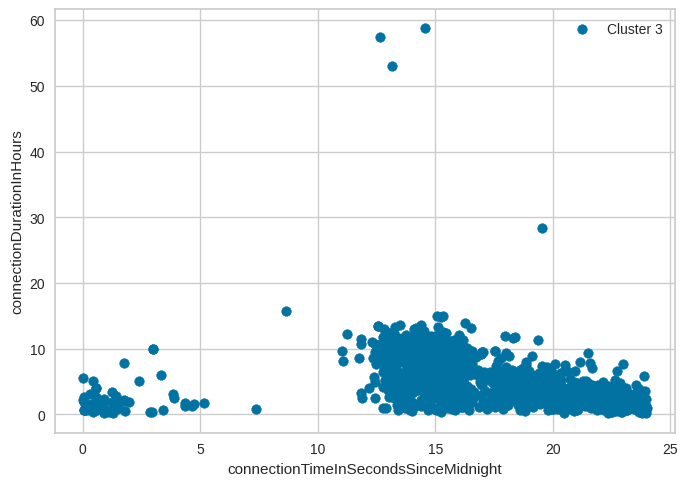

Cluster 4


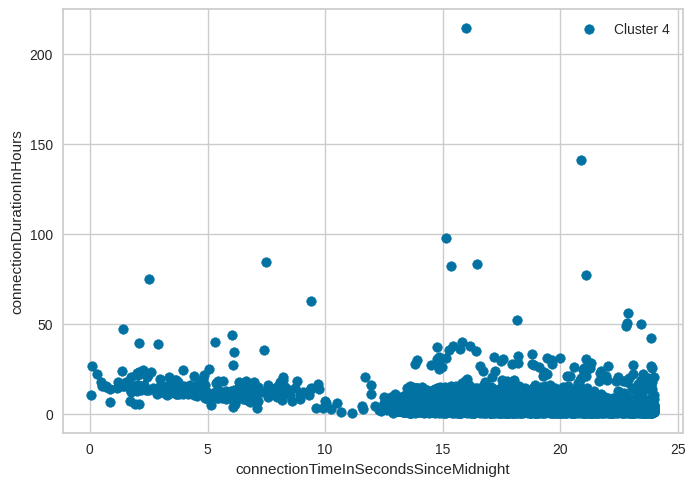

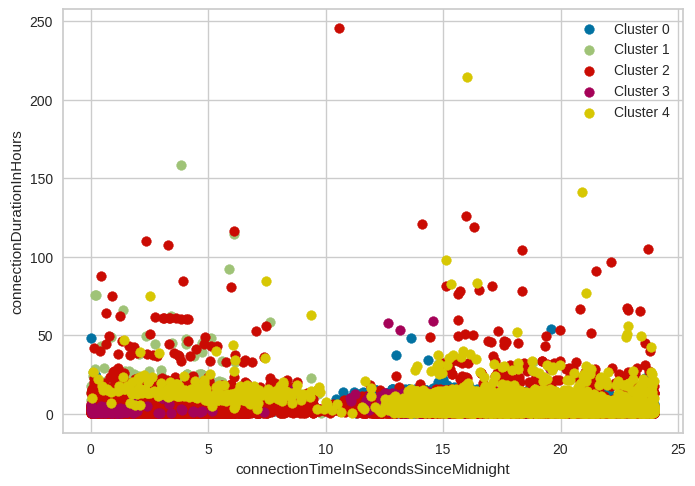

Cluster 0


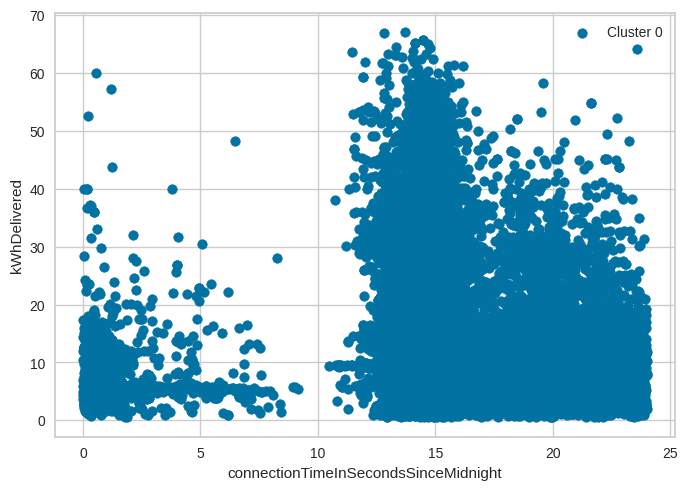

Cluster 1


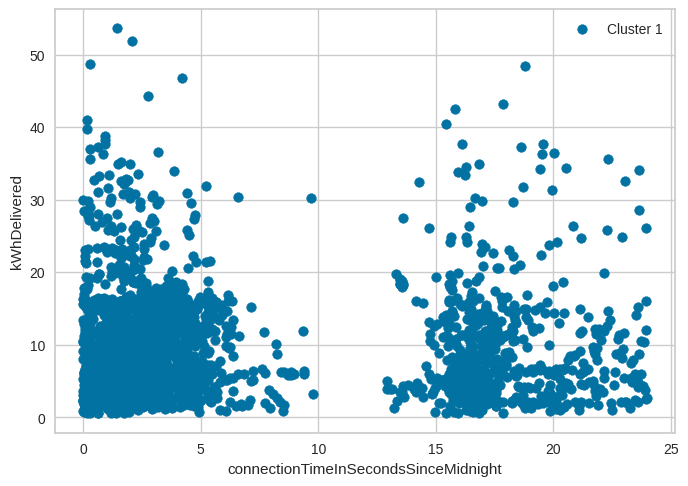

Cluster 2


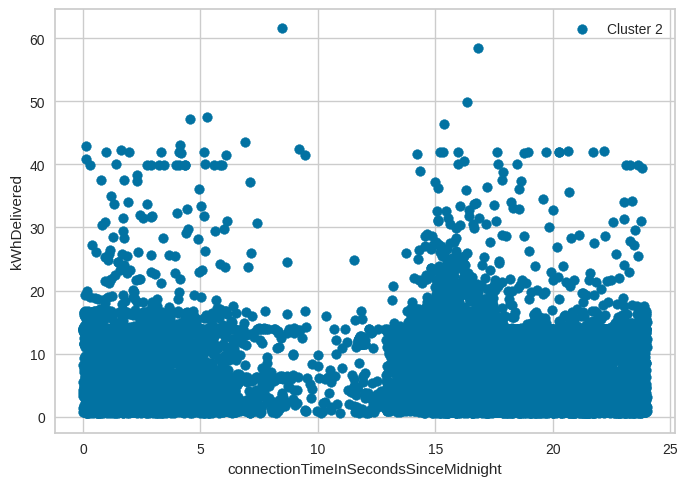

Cluster 3


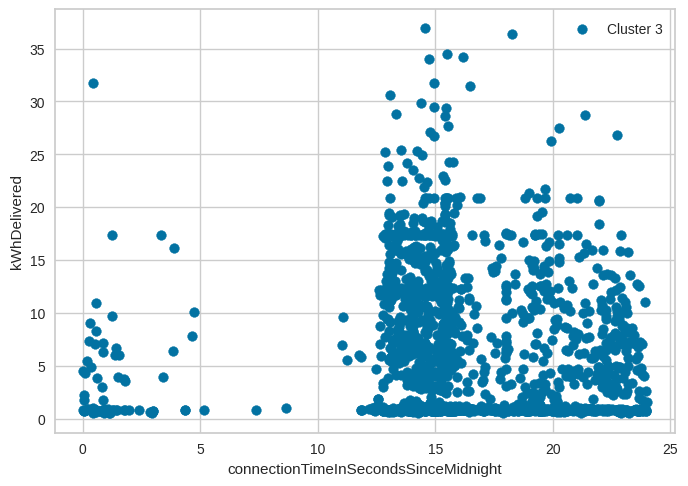

Cluster 4


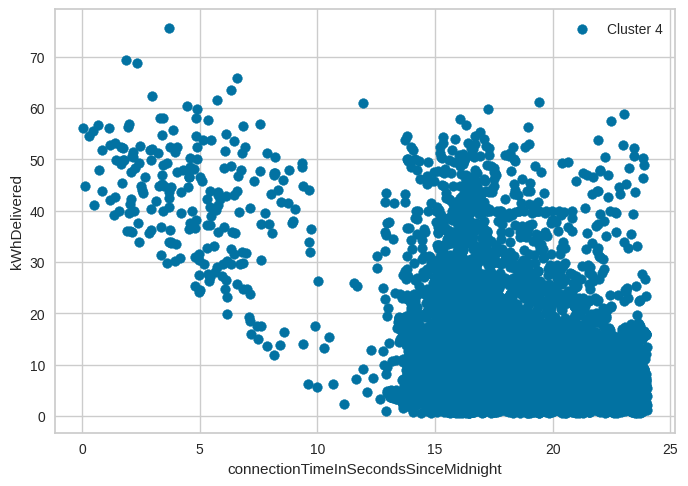

In [86]:
# Plot each cluster individually in an own plot
def plot_each_cluster_individually(clustered_data: pd.DataFrame, field_x: str, field_y: str):
    for name, group in clustered_data:
        print(f'Cluster {name}')
        plt.scatter(group[field_x], group[field_y], label=f'Cluster {name}')
        plt.xlabel(field_x)
        plt.ylabel(field_y)
        plt.legend()
        plt.show()

def plot_clustered_data(clustered_data: pd.DataFrame, field_x: str, field_y: str):
    for name, group in clustered_data:
        plt.scatter(group[field_x], group[field_y], label=f'Cluster {name}')
        plt.xlabel(field_x)
        plt.ylabel(field_y)
    plt.legend()
    plt.show()

plot_each_cluster_individually(df_original, 'connectionTimeInSecondsSinceMidnight', 'connectionDurationInHours')    
plot_clustered_data(df_original, 'connectionTimeInSecondsSinceMidnight', 'connectionDurationInHours')
plot_each_cluster_individually(df_original, 'connectionTimeInSecondsSinceMidnight', 'kWhDelivered')    